# MLP-4a
- Dataset: EMNIST ByClass
- Model: MLP (4 hidden layer, (1024, 512, 256, 128) units, elu, Dropout 0.2)
- Batch Size: 2048
- Output Layer: 62 classes
- Accuracy

In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

In [6]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# ds = tfds.load('mnist', split='train', shuffle_files=True)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    image = tf.reshape(image, [-1])
    return image, label

BATCH_SIZE = 2048
ds_train = ds_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
    tf.keras.layers.Dense(1024, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation='softmax')  # 62 classes for EMNIST ByClass
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [8]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)

test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6205 - loss: 1.4069 - val_accuracy: 0.8172 - val_loss: 0.5454
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.7892 - loss: 0.6459 - val_accuracy: 0.8343 - val_loss: 0.4754
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8117 - loss: 0.5602 - val_accuracy: 0.8418 - val_loss: 0.4467
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8226 - loss: 0.5206 - val_accuracy: 0.8468 - val_loss: 0.4302
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8291 - loss: 0.4954 - val_accuracy: 0.8501 - val_loss: 0.4183
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8333 - loss: 0.4775 - val_accuracy: 0.8516 - val_loss: 0.4127
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8383 - loss: 0.4620 - val_accuracy: 0.8532 - val_loss: 0.4049
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8406 - loss: 0.4527 - 

In [9]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

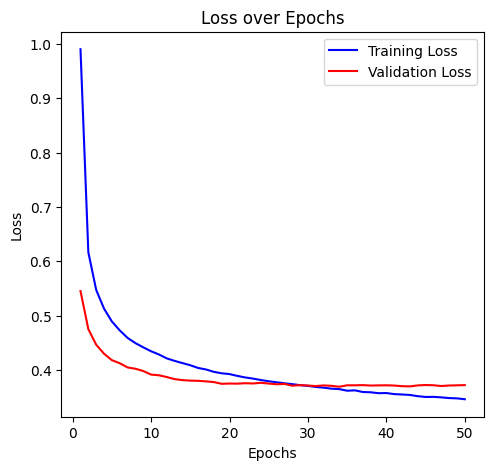

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

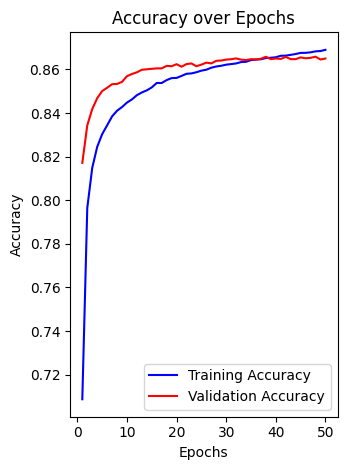

In [11]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
output_file = "mlp-4a.csv"
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_loss[epoch - 1],
            train_accuracy[epoch - 1],
            val_loss[epoch - 1],
            val_accuracy[epoch - 1]
        ])

print(f"Training results saved to {output_file}")

Training results saved to mlp-4a.csv
